### Regression using spark

We are trying to perform regression using Spark.  Then we demonstrates the parameters.

In [1]:
import findspark
findspark.init()

from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.regression import LinearRegression # where the new dataframe API lives

from pyspark.sql import SparkSession # we need sparkSQL for using data frame through spark session
from pyspark.ml.linalg import Vectors # for feature data

if __name__ == "__main__":

    # Create a SparkSession (Note, the config section is only for Windows!)
    spark = SparkSession.builder.config("spark.sql.warehouse.dir", "file:///C:/temp").appName("LinearRegression").getOrCreate()

    # Load up our data and convert it to the format MLLib expects.
    inputLines = spark.sparkContext.textFile("regression.txt") # getting regression into input
    data = inputLines.map(lambda x: x.split(",")).map(lambda x: (float(x[0]), Vectors.dense(float(x[1])))) # using Vectors.desne fot the target
    # #label is simple float, bu feature should go into Vectors.dense
    print("data type of \"data\" is {}".format(type(data)))

    # Convert this RDD to a DataFrame
    colNames = ["label", "features"]
    df = data.toDF(colNames) # generate a dataframe from the RDD
    print("data type of \"df\" is {}".format(type(df)))

    # Note, there are lots of cases where you can avoid going from an RDD to a DataFrame.
    # Perhaps you're importing data from a real database. Or you are using structured streaming
    # to get your data.

    # Let's split our data into training data and testing data
    trainTest = df.randomSplit([0.7, 0.3])
    trainingDF = trainTest[0]
    testDF = trainTest[1]

    # Now create our linear regression model
    lir = LinearRegression(maxIter=20, regParam=0.5, elasticNetParam=0.3) # between MAE and MSE loss function

    # Train the model using our training data
    model = lir.fit(trainingDF)

    # Now see if we can predict values in our test data.
    # Generate predictions using our linear regression model for all features in our
    # test dataframe:
    fullPredictions = model.transform(testDF).cache()

    # Extract the predictions and the "known" correct labels.
    actual = testDF.select("features")
    predictions = fullPredictions.select("prediction").rdd.map(lambda x: x[0])
    labels = fullPredictions.select("label").rdd.map(lambda x: x[0])

    # Zip them together

    predictionAndLabel = predictions.zip(labels).collect() # zip connectes to dataframe together (concata horizontally)
    x = []
    y = []
    z = []
    # Print out the predicted and actual values for each point
    for prediction in predictionAndLabel:
        print(prediction)
        x.append(float(prediction[0]))
        y.append(float(prediction[1]))

    # Stop the session
    spark.stop()

data type of "data" is <class 'pyspark.rdd.PipelinedRDD'>
data type of "df" is <class 'pyspark.sql.dataframe.DataFrame'>
(-1.465706897402863, -2.29)
(-1.3654260522540327, -2.27)
(-1.4030313691848442, -2.26)
(-1.3654260522540327, -2.17)
(-1.2714127599270044, -2.07)
(-1.233807442996193, -1.94)
(-1.1397941506691647, -1.91)
(-1.1585968091345704, -1.91)
(-1.052048411163938, -1.75)
(-1.0332457526985324, -1.74)
(-0.9078946962624945, -1.67)
(-1.0708510696293436, -1.61)
(-1.0144430942331266, -1.6)
(-1.008175541411325, -1.59)
(-1.0269781998767304, -1.58)
(-0.876556932153485, -1.46)
(-0.8201489567572681, -1.4)
(-0.8201489567572681, -1.39)
(-0.876556932153485, -1.36)
(-0.8076138511136642, -1.34)
(-0.9204298019060982, -1.33)
(-0.7073330059648338, -1.3)
(-0.7073330059648338, -1.29)
(-0.7386707700738433, -1.27)
(-0.7449383228956452, -1.22)
(-0.7700085341828529, -1.17)
(-0.6822627946776264, -1.12)
(-0.6571925833904187, -1.09)
(-0.7324032172520414, -1.09)
(-0.6195872664596074, -1.05)
(-0.72613566443023

ValueError: x and y must be the same size

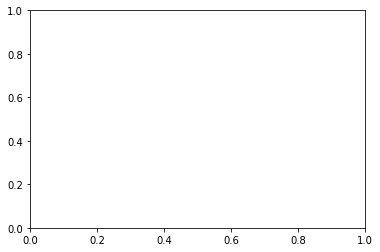

In [2]:
plt.scatter(z,x, alpha= 0.35, color='gold')
plt.plot(z, y, color = 'blue')
plt.xlabel("feature")
plt.ylabel("label")
plt.title("regression data")
plt.show()

In [ ]:
predictionAndLabel

In [ ]:
actual.rdd.map(lambda x: x[0][0]).collect()